In [2]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [3]:
import os 
os.chdir('/Users/brettlv/timing_analysis/python_ccf_code/Release/CPython/')
#os.chdir('/Users/brettlv/timing_analysis/python_ccf_code/Release/PurePython/')

In [7]:
# ls /Users/brettlv/Downloads/NGC1566/dcf*.csv > /Users/brettlv/Downloads/NGC1566/dcf_ngc1566.txt

In [8]:
dcf_lists=[]
with open ('/Users/brettlv/Downloads/NGC1566/dcf_ngc1566.txt','r') as f:
    dcf_list=f.readlines()
    for line in dcf_list:
        dcf_lists.append(line.rstrip('\n')) 

In [13]:
for i,l in enumerate(dcf_lists):
    print(i,l.split('/')[-1][4:-4])

(0, 'ASAS_V_data')
(1, 'e12_xrt_fit_NGC1566')
(2, 'neowise_w1mpro_allwise_data')
(3, 'neowise_w1mpro_data')
(4, 'neowise_w2mpro_allwise_data')
(5, 'neowise_w2mpro_data')
(6, 'neowise_w3mpro_allwise_data')
(7, 'neowise_w4mpro_allwise_data')
(8, 'uvot-b')
(9, 'uvot-u')
(10, 'uvot-uvm2')
(11, 'uvot-uvw1')
(12, 'uvot-uvw2')
(13, 'uvot-v')
(14, 'wise_multi_w1mpro_ep_data')
(15, 'wise_multi_w2mpro_ep_data')
(16, 'wise_multi_w3mpro_ep_data')
(17, 'wise_multi_w4mpro_ep_data')
(18, 'xrt_fit_NGC1566')


## def_plot

In [10]:
def plot_dcf(m,dcf_lists):
    dcf_path=dcf_lists[m]   
    dcf_data=pd.read_csv(dcf_path,header=None)
    plt.errorbar(dcf_data[0], dcf_data[1],dcf_data[2],fmt='.',label=dcf_path.split('/')[-1][4:-4])
    plt.legend(loc=(1.0,0.5))

(58000, 59000)

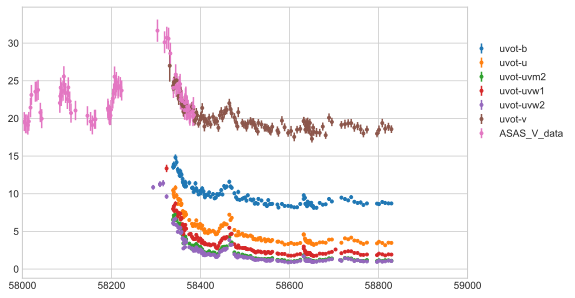

In [11]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
for i in range(8,14):
    plot_dcf(i,dcf_lists)

plot_dcf(0,dcf_lists)    
    
plt.xlim(58000,59000)

In [5]:
for i,j in enumerate(dcf_lists):
    print(i,j.split('/')[-1][4:-4])

(0, 'ASAS_V_data')
(1, 'e12_xrt_fit_NGC1566')
(2, 'neowise_w1mpro_allwise_data')
(3, 'neowise_w1mpro_data')
(4, 'neowise_w2mpro_allwise_data')
(5, 'neowise_w2mpro_data')
(6, 'neowise_w3mpro_allwise_data')
(7, 'neowise_w4mpro_allwise_data')
(8, 'uvot-ubb')
(9, 'uvot-um2')
(10, 'uvot-uuu')
(11, 'uvot-uvv')
(12, 'uvot-uw1')
(13, 'uvot-uw2')
(14, 'wise_multi_w1mpro_ep_data')
(15, 'wise_multi_w2mpro_ep_data')
(16, 'wise_multi_w3mpro_ep_data')
(17, 'wise_multi_w4mpro_ep_data')
(18, 'xrt_fit_NGC1566')


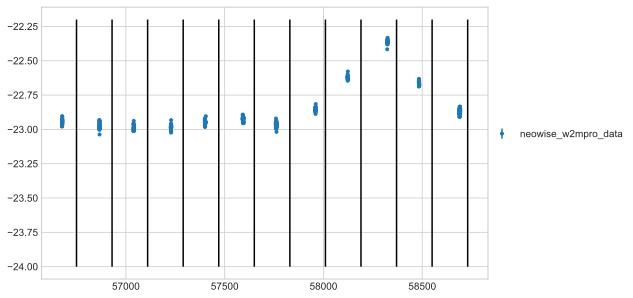

In [39]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
for i in range(12):
    plt.vlines(56750+i*180,-24,-22.2)
plot_dcf(5,dcf_lists)

In [92]:
def get_new_range_datas(mjd1, flux1, err1,rangemin,rangemax):
    mjd_s=[]
    flux_s=[]
    err_s=[]
    for i,j,k in zip(mjd1, flux1, err1):
        if i>=rangemin and i<rangemax:
            mjd_s.append(i)
            flux_s.append(j)
            err_s.append(k)
    return np.array(mjd_s),np.array(flux_s),np.array(err_s)

In [104]:
def get_mean_and_err(mjd1, flux1, err1):
    mean_mjd=np.mean(mjd1)
    mean_flux=np.mean(flux1)
    flux_0=flux1-mean_flux
    size=len(mjd1)
    err=np.sqrt(np.sum(err1**2))
    #err=np.sqrt(np.sum(flux_0**2)/(size-1))/np.sqrt(size)*2.0
    #err2=1.253*np.sum(abs(flux_0))/np.sqrt(size*(size-1))/np.sqrt(size)*2.0    
    return mean_mjd,mean_flux,err

(56677.232660736925, -22.949661538461537, 0.03265333061113369, 39)
(56866.670712499705, -22.97504705882353, 0.03208488740824876, 34)
(57039.707184750005, -22.99009696969697, 0.030784411639659445, 33)
(57228.48531015594, -22.9828125, 0.030630703550522633, 32)
(57400.85283333257, -22.950182857142856, 0.03248384213728419, 35)
(57593.1111634125, -22.92769090909091, 0.03675214279467253, 44)
(57761.73569595083, -22.96525, 0.03939543120718442, 48)
(57959.58553316588, -22.85648235294118, 0.03246413405590853, 34)
(58123.30776760027, -22.62247567567568, 0.0311384007296457, 37)
(58323.7415991457, -22.36372571428571, 0.03066463761403353, 35)
(58483.771465625985, -22.66618, 0.02354230235129946, 20)
(58689.54529071087, -22.86903188405797, 0.04553152753861878, 69)


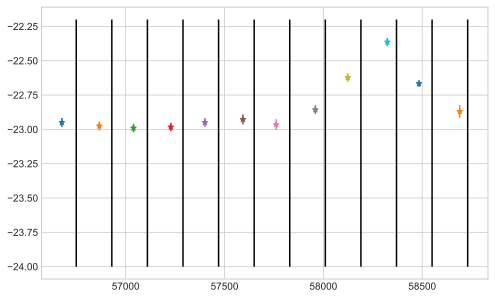

In [105]:
m=5
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_datas(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,-24,-22.2)
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)


In [106]:
rebin_neowise_w2=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w2.to_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w2.csv',index=False,header=False)

(56677.232660736925, -23.0161641025641, 0.03777830064997631, 39)
(56866.670712499705, -23.030600000000003, 0.03534289178887319, 34)
(57039.707184750005, -23.02690909090909, 0.03576814224977305, 33)
(57228.48531015594, -23.0315, 0.03381597255735815, 32)
(57400.85283333257, -23.02345142857143, 0.03741871189658992, 35)
(57593.1111634125, -23.01972727272727, 0.043517352860669274, 44)
(57761.73569595083, -23.034591666666667, 0.04423754061880023, 48)
(57959.58553316588, -22.977388235294118, 0.03594662710185755, 34)
(58123.30776760027, -22.84450810810811, 0.037174184590922775, 37)
(58323.7415991457, -22.607862857142855, 0.03709231726382163, 35)
(58483.771465625985, -22.9042, 0.028224811779709, 20)
(58689.54529071087, -22.9891884057971, 0.052364873722754265, 69)


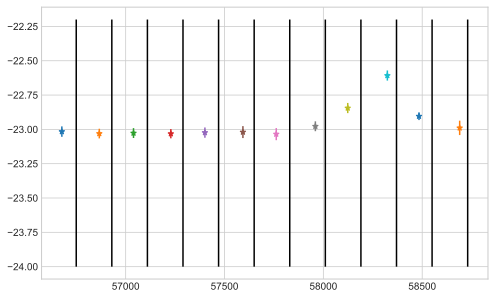

In [107]:
m=3
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_datas(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,-24,-22.2)
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)

In [108]:
rebin_neowise_w1=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w1.to_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w1.csv',index=False,header=False)


(56677.232660736925, -21.72159999999999, 0.03746998799039039, 39)
(56866.670712499705, -21.721599999999995, 0.034985711369071804, 34)
(57039.707184750005, -21.7216, 0.03446737587922817, 33)
(57228.48531015594, -21.7216, 0.03394112549695428, 32)
(57400.85283333257, -21.721599999999995, 0.0354964786985977, 35)
(57593.1111634125, -21.721599999999995, 0.0397994974842648, 44)
(57761.73569595083, -21.7216, 0.041569219381653054, 48)
(57959.58553316588, -21.721599999999995, 0.034985711369071804, 34)
(58123.30776760027, -21.721599999999995, 0.036496575181789316, 37)
(58323.7415991457, -21.721599999999995, 0.0354964786985977, 35)
(58483.771465625985, -21.721600000000002, 0.02683281572999748, 20)
(58689.54529071087, -21.721600000000006, 0.04983974317750845, 69)


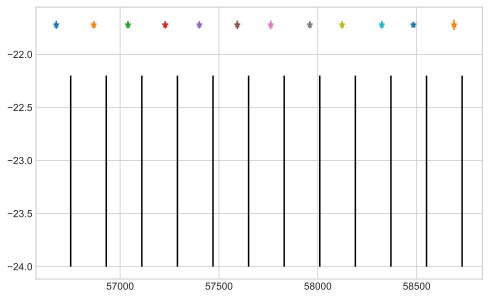

In [113]:
m=6
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_datas(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,-24,-22.2)
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)
    
rebin_neowise_w3=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w3.to_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w3.csv',index=False,header=False)
    

(56677.232660736925, -20.795600000000007, 0.04496398558846848, 39)
(56866.670712499705, -20.795600000000004, 0.041982853642886175, 34)
(57039.707184750005, -20.7956, 0.04136085105507382, 33)
(57228.48531015594, -20.7956, 0.040729350596345144, 32)
(57400.85283333257, -20.795600000000004, 0.042595774438317247, 35)
(57593.1111634125, -20.795600000000004, 0.04775939698111777, 44)
(57761.73569595083, -20.795600000000004, 0.04988306325798368, 48)
(57959.58553316588, -20.795600000000004, 0.041982853642886175, 34)
(58123.30776760027, -20.795600000000004, 0.04379589021814719, 37)
(58323.7415991457, -20.795600000000004, 0.042595774438317247, 35)
(58483.771465625985, -20.795599999999997, 0.03219937887599698, 20)
(58689.54529071087, -20.795599999999997, 0.059807691813010155, 69)


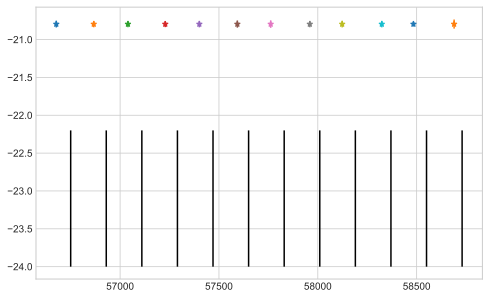

In [114]:
m=7
dcf_path=dcf_lists[m]
dcf_data=pd.read_csv(dcf_path ,header=None)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
#plot_dcf(m,dcf_lists)

rebin_wise_mjd=[]
rebin_wise_flux=[]
rebin_wise_err=[]

for i in range(12):
    rangemin=56750+i*180-180
    rangemax=56750+i*180   
    mjd1, flux1, err1=get_new_range_datas(dcf_data[0], dcf_data[1],dcf_data[2],rangemin,rangemax)
    mean_mjd,mean_flux,err=get_mean_and_err(mjd1, flux1, err1)
    print(mean_mjd,mean_flux,err,len(mjd1))
    plt.errorbar(mean_mjd,mean_flux,err,fmt='.',marker='*')
    plt.vlines(56750+i*180,-24,-22.2)
    rebin_wise_mjd.append(mean_mjd)
    rebin_wise_flux.append(mean_flux)
    rebin_wise_err.append(err)
    
rebin_neowise_w4=pd.DataFrame({'t':rebin_wise_mjd,'flux':rebin_wise_flux,'err':rebin_wise_err},index=None,columns=['t','flux','err'])    
rebin_neowise_w4.to_csv('/Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w4.csv',index=False,header=False)
    

<Container object of 3 artists>

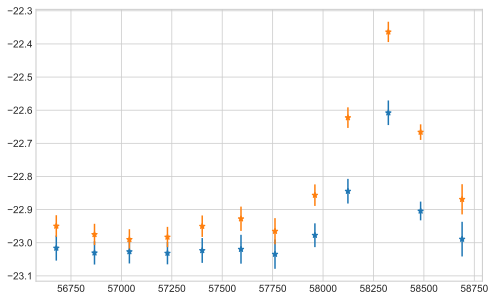

In [109]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
plt.errorbar(rebin_neowise_w1['t'],rebin_neowise_w1['flux'],rebin_neowise_w1['err'],fmt='.',marker='*')
plt.errorbar(rebin_neowise_w2['t'],rebin_neowise_w2['flux'],rebin_neowise_w2['err'],fmt='.',marker='*')

In [110]:
cat /Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w1.csv

56677.232660736925,-23.0161641025641,0.03777830064997631
56866.670712499705,-23.030600000000003,0.03534289178887319
57039.707184750005,-23.02690909090909,0.03576814224977305
57228.48531015594,-23.0315,0.03381597255735815
57400.85283333257,-23.02345142857143,0.03741871189658992
57593.1111634125,-23.01972727272727,0.043517352860669274
57761.73569595083,-23.034591666666667,0.04423754061880023
57959.58553316588,-22.977388235294118,0.03594662710185755
58123.30776760027,-22.84450810810811,0.037174184590922775
58323.7415991457,-22.607862857142855,0.03709231726382163
58483.771465625985,-22.9042,0.028224811779709
58689.54529071087,-22.9891884057971,0.052364873722754265


In [112]:
cat /Users/brettlv/Downloads/NGC1566/rebin_dcf_neowise_w2.csv

56677.232660736925,-22.949661538461537,0.03265333061113369
56866.670712499705,-22.97504705882353,0.03208488740824876
57039.707184750005,-22.99009696969697,0.030784411639659445
57228.48531015594,-22.9828125,0.030630703550522633
57400.85283333257,-22.950182857142856,0.03248384213728419
57593.1111634125,-22.92769090909091,0.03675214279467253
57761.73569595083,-22.96525,0.03939543120718442
57959.58553316588,-22.85648235294118,0.03246413405590853
58123.30776760027,-22.62247567567568,0.0311384007296457
58323.7415991457,-22.36372571428571,0.03066463761403353
58483.771465625985,-22.66618,0.02354230235129946
58689.54529071087,-22.86903188405797,0.04553152753861878


(58000, 59000)

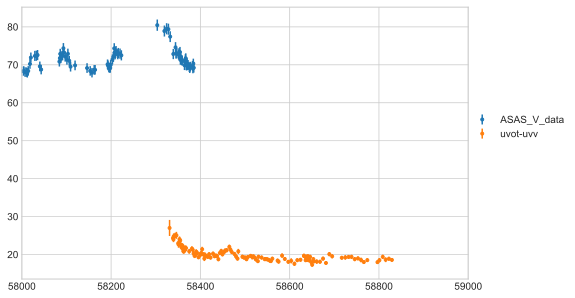

In [81]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
plot_dcf(0,dcf_lists)
plot_dcf(11,dcf_lists)
plt.xlim(58000,59000)

In [ ]:
''' 0 ASAS_V_data
    1 e12_xrt_fit_NGC1566
    2 neowise_w1mpro_allwise_data
    3 neowise_w1mpro_data
    4 neowise_w2mpro_allwise_data
    5 neowise_w2mpro_data
    6 neowise_w3mpro_allwise_data
    7 neowise_w4mpro_allwise_data
    8 uvot-ubb
    9 uvot-um2
    10 uvot-uuu
    11 uvot-uvv
    12 uvot-uw1
    13 uvot-uw2
    14 wise_multi_w1mpro_ep_data
    15 wise_multi_w2mpro_ep_data
    16 wise_multi_w3mpro_ep_data
    17 wise_multi_w4mpro_ep_data
    18 xrt_fit_NGC1566
    '''

In [79]:
pwd

u'/Users/brettlv/timing_analysis/python_ccf_code/Release/PurePython'